# **Tasks**

Go to this [url](https://drive.google.com/file/d/1PU1AQVCgnFL2XbgIJRl3TwkHY5Ag3qIv/view?usp=sharing) and download the data first. In order to know more about the dataset please refer to these links - [UCI/iris](https://archive.ics.uci.edu/ml/datasets/Iris), or [Kaggle/iris_dataset](https://www.kaggle.com/uciml/iris).

**The "species" field refers to the Predicted attribute: class of iris plant.**

 Now try to do the following:

1. Find the measures of center and spread from the dataset.
2. Can you measure your confidence interval estimate for the PetalLengthCm feature?
3. Apply regression on each column against the class field and verify the outcomes using a correlation matrix.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

# load the dataset
df = pd.read_csv('/content/drive/MyDrive/Iris.csv')

#Check number of rows and columns in the dataset
print("The dataset has %d rows and %d columns." % df.shape)

The dataset has 150 rows and 6 columns.


In [3]:
df.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [4]:
print(df.dtypes)

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object


In [5]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [6]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

def preprocess_data(df):
    pre_df = df.copy()

    #Converting string to categorical vaiable
    le = LabelEncoder()
    le.fit(pre_df['Species'])
    pre_df['Species'] = le.transform(pre_df['Species'])

    return pre_df

In [7]:
pre_df = preprocess_data(df)

pre_df.head(3)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0


In [8]:
pre_df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species            int64
dtype: object

**1. Find the measures of center and spread from the dataset.**

In [9]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [10]:
def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-1.5.1.min.js?noext',
            },
          });
        </script>
        '''))

In [11]:
import plotly
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly.offline import init_notebook_mode

configure_plotly_browser_state()

init_notebook_mode(connected=False)# to show plots in notebook

from plotly.offline import plot, iplot

# do not show any warnings
import warnings
warnings.filterwarnings('ignore')


colors = plotly.colors.DEFAULT_PLOTLY_COLORS


def create_box_trace(col, visible=False):
    return go.Box(
        y=df[col],
        name=col,
        marker = dict(color = colors[0]),
        visible=visible,
    )

features_not_for_hist = ["Id", "Species"]
features_for_hist = [x for x in df.columns if x not in features_not_for_hist]
# remove features with too less distinct values (e.g. binary features), because boxplot does not make any sense for them
features_for_box = [col for col in features_for_hist if len(df[col].unique())>5]

active_idx = 0
box_traces = [(create_box_trace(col) if i != active_idx else create_box_trace(col, visible=True)) for i, col in enumerate(features_for_box)]

data = box_traces

n_features = len(features_for_box)
steps = []
for i in range(n_features):
    step = dict(
        method = 'restyle',
        args = ['visible', [False] * len(data)],
        label = features_for_box[i],
    )
    step['args'][1][i] = True # Toggle i'th trace to "visible"
    steps.append(step)

sliders = [dict(
    active = active_idx,
    currentvalue = dict(
        prefix = "Feature: ",
        xanchor= 'center',
    ),
    pad = {"t": 50},
    steps = steps,
    len=1,
)]

layout = dict(
    sliders=sliders,
    yaxis=dict(
        title='value',
        automargin=True,
    ),
    legend=dict(
        x=0,
        y=1,
    ),
)

fig = dict(data=data, layout=layout)

iplot(fig, filename='box_slider')

Output hidden; open in https://colab.research.google.com to view.

**2. Can you measure your confidence interval estimate for the PetalLengthCm feature?**

### **Confidence Interval Estimate- Example**

Usually, finding a large sample size is not a problem for many data mining scenarios. For example, using the statistics in Figure 1, we can find the 95% t-interval for the mean number of sugars for all Cereals is as follows:


In [12]:
import numpy as np
import scipy.stats as st
confidence_level=0.95
st.t.interval(confidence_level, df=len(df['PetalLengthCm'])-1, loc=np.mean(df['PetalLengthCm']), scale=st.sem(df['PetalLengthCm']))

(3.473993663967714, 4.0433396693656185)

**3. Apply regression on each column against the class field and verify the outcomes using a correlation matrix.**

In [13]:
df.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


## **Regression - Calculation**

In [14]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

def preprocess_data(df):
    pre_df = df.copy()

    #Converting string to categorical vaiable
    le = LabelEncoder()
    le.fit(pre_df['Species'])
    pre_df['Species'] = le.transform(pre_df['Species'])

    return pre_df

In [15]:
pre_df = preprocess_data(df)

pre_df.head(3)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0


In [16]:
#lebelencoder
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

#Converting categorical variable to numerical labels
le = LabelEncoder()
df['Species'] = le.fit_transform(df['Species'])
print(df)

      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species
0      1            5.1           3.5            1.4           0.2        0
1      2            4.9           3.0            1.4           0.2        0
2      3            4.7           3.2            1.3           0.2        0
3      4            4.6           3.1            1.5           0.2        0
4      5            5.0           3.6            1.4           0.2        0
..   ...            ...           ...            ...           ...      ...
145  146            6.7           3.0            5.2           2.3        2
146  147            6.3           2.5            5.0           1.9        2
147  148            6.5           3.0            5.2           2.0        2
148  149            6.2           3.4            5.4           2.3        2
149  150            5.9           3.0            5.1           1.8        2

[150 rows x 6 columns]


<Axes: xlabel='SepalLengthCm', ylabel='Species'>

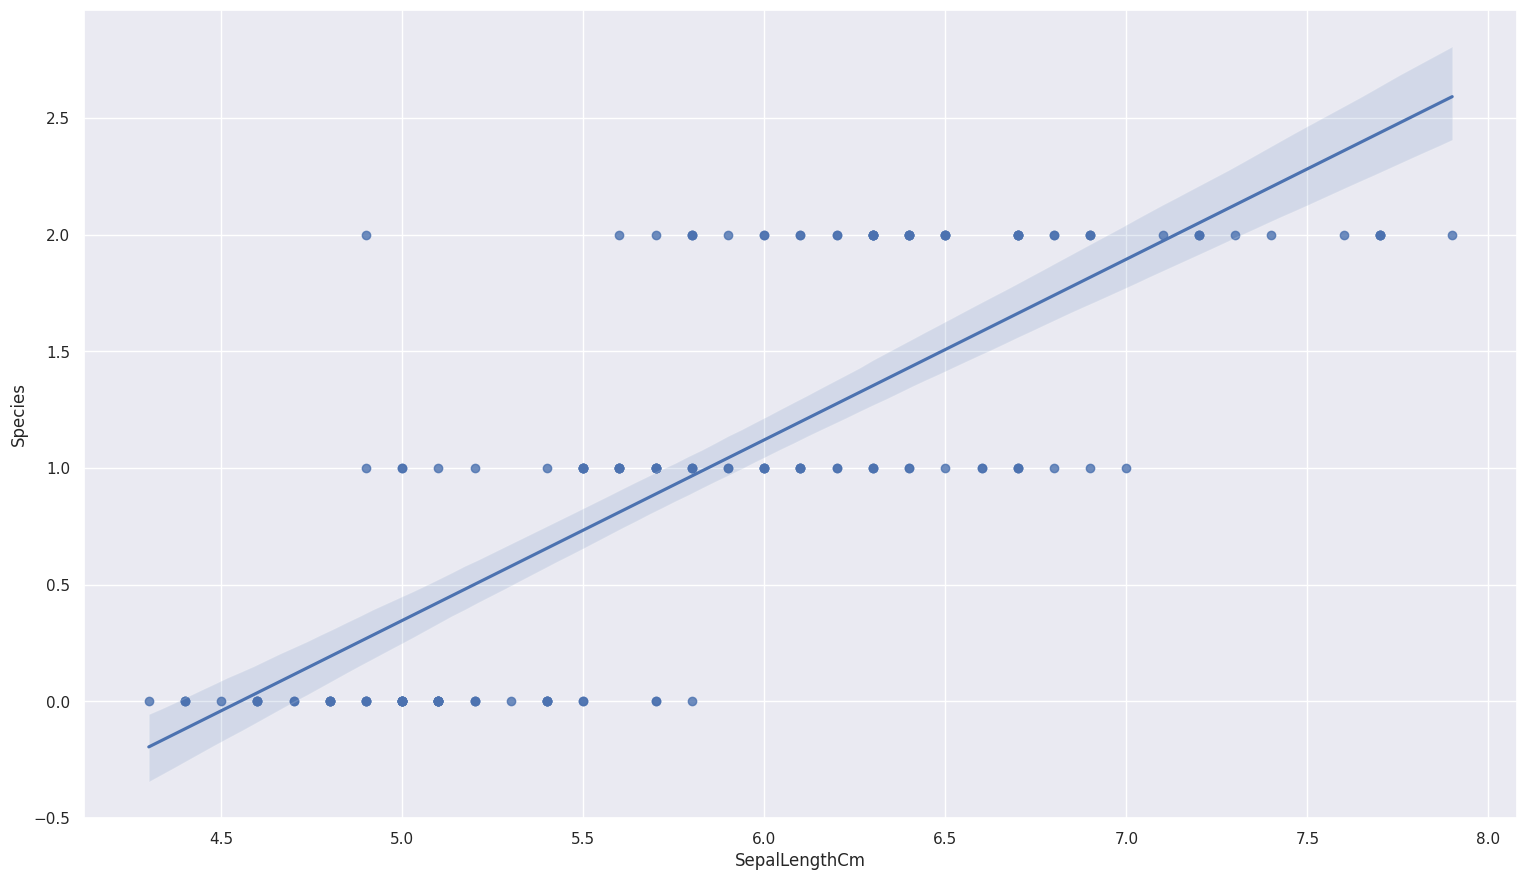

In [17]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(color_codes=True)
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
sns.regplot(x="SepalLengthCm", y="Species", data=df, ax=ax)

To calculate $b_0$ and $b_1$ we need to calculate the $\bar{x}$, $\bar{y}$,$\sum{x^2}$,$\sum{xy}$,$\sigma$ and co-variance of x and y. In the given scenario, $\bar{x}=6.92$, $\bar{y}=42.67$, $\sigma=4.44$, $\sum{x^2} = 5191$, $\sum{xy} = 19135.91$.

Thus we can calculate the variance of $x$ as:

$\sigma(x)  = \sum{x^2}-n\times\bar{x} = (\sigma)^2 = 19.76$

Now we can find the co-variance of $x$ and $y$ by using:

Cov(x,y)  $= \frac{\sum{xy}-n\times\bar{x}\times\bar{y}}{n-1} = -47.43$

slope of the regression line is, $b_1=\frac{Cov(x,y)}{\sigma^{2}(x)} = \frac{-47.43}{19.76} = -2.42$

intercept is, $b_0 = \bar{y} - b_{1}\times\bar{x} = 59.4$

regression equation, $ \hat{y} = 59.4 - 2.42(x)$

In [18]:
# implementing the regression equation
def regression_equation(x, y):
    x_mean = x.mean()
    y_mean = y.mean()
    x_squared = (x**2).sum()
    xy = (x*y).sum()
    std_dev = x.std()
    var_x = std_dev ** 2
    cov_xy = (xy - len(x)*x_mean*y_mean)/(len(x)-1)
    b_1 = cov_xy/var_x
    b_0 = y_mean - b_1*x_mean
    print('Regression equation is: %.3f %.3f (x)' % (b_0, b_1))
    y_hat = b_0+b_1*x
    return y_hat


## **Residuals**
Now, there is one cereal in our data set that does have a sugar content of 1 gram, Cheerios. Its nutrition rating, however, is 50.765, not 56.98 as we estimated
above for the new cereal with 1 gram of sugar. Cheerios’ point in the scatter
plot is located at $(x = 1, ŷ = 50.765)$, within the oval in Figure 4. Now, the
upper arrow in Figure 4 is pointing to a location on the regression line directly
above the Cheerios point. This is where the regression equation predicted the
nutrition rating to be for a cereal with a sugar content of 1 gram. The prediction
was too high by $56.98 − 50.765 = 6.215$ rating points, which represents the
vertical distance from the Cheerios data point to the regression line. This vertical
distance of $6.215$ rating points, in general $(y − ŷ)$, is known variously as the
prediction error, estimation error, or residual.

In [21]:
#plot libaries
import plotly
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly.offline import init_notebook_mode

configure_plotly_browser_state()

init_notebook_mode(connected=False)# to show plots in notebook

from plotly.offline import plot, iplot

# do not show any warnings
import warnings
warnings.filterwarnings('ignore')

SEED = 17 # specify seed for reproducable results
pd.set_option('display.max_columns', None) # prevents abbreviation (with '...') of columns in prints

colors = plotly.colors.DEFAULT_PLOTLY_COLORS

def create_scatter_trace(x, y, visible=False):
    return go.Scatter(x=df[x], y=df[y],
                    mode='markers',
                    name=y.title(),
                    marker = dict(
                        size=8,
                    ),
                    visible=visible)

def create_line_trace(x,y, visible=False):
    return go.Scatter(x=df[x], y=regression_equation(df[x],df[y]),
                    mode='lines',
                    name='Regression',
                    visible=visible)

features_not_for_reg = ["Id", "Species"]
features_for_reg = [x for x in df.columns if x not in features_not_for_reg]
active_idx = 0

traces_scatter = [(create_scatter_trace(col,'Species') if i != active_idx else create_scatter_trace(col,'Species', visible=True)) for i, col in enumerate(features_for_reg)]
traces_line = [(create_line_trace(col,'Species') if i != active_idx else create_line_trace(col,'Species', visible=True)) for i, col in enumerate(features_for_reg)]

data = traces_scatter + traces_line

n_features = len(features_for_reg)

steps = []
for i in range(n_features):
    step = dict(
        method = 'restyle',
        args = ['visible', [False] * len(data)],
        label = features_for_reg[i],
    )
    step['args'][1][i] = True # Toggle i'th trace to "visible"
    step['args'][1][i + n_features] = True # Toggle i'th trace to "visible"
    steps.append(step)

sliders = [dict(
    active = active_idx,
    currentvalue = dict(
        prefix = "Feature: ",
        xanchor= 'center',
    ),
    pad = {"t": 50},
    steps = steps,
)]

layout = dict(
    sliders=sliders,
    yaxis=dict(
        title='Species',
        automargin=True,
    ),
)

fig = dict(data=data, layout=layout)

iplot(fig, filename='regression_slider')

Output hidden; open in https://colab.research.google.com to view.

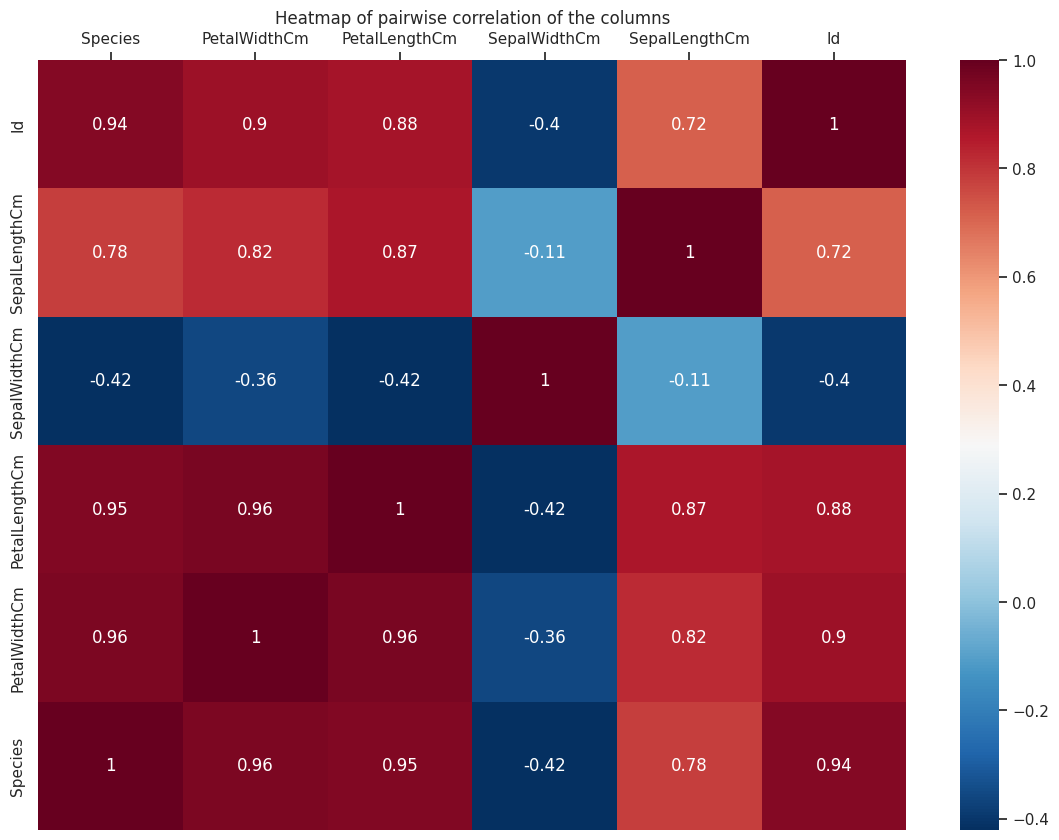

In [20]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize=(14, 10))

corr = df.corr()

ax = sns.heatmap(corr, cmap = "RdBu_r", annot=True)

ax.invert_xaxis()

ax.xaxis.set_ticks_position('top')

plt.title("Heatmap of pairwise correlation of the columns")

plt.show()